In [78]:
# Ref: https://ithelp.ithome.com.tw/articles/10235449

from sklearn import datasets
import pandas as pd

In [79]:
# load House price data
data = datasets.fetch_california_housing()
df_data = pd.DataFrame(data.data, columns=data.feature_names)
df_data
# data.DESCR

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [80]:
# check data is valid
df_data.isnull().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

### Initial inference
Pick 3 features to predict: 
1. MedInc(Median Income): MedInc has positive correlation with housing price
2. HouseAge: HouseAge has negative correlation with housing price
3. Population: Population has positive correlation with housing price

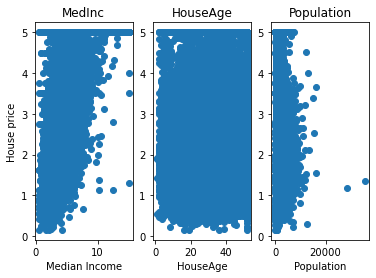

In [81]:
from matplotlib import pyplot as plt
%matplotlib inline

# MedInc
y = data.target
x = df_data["MedInc"]
plt.subplot(1,3,1)
plt.title("MedInc")
plt.xlabel("Median Income")
plt.ylabel("House price")
plt.scatter(x, y)

# HouseAge
y = data.target
x = df_data["HouseAge"]
plt.subplot(1,3,2)
plt.title("HouseAge")
plt.xlabel("HouseAge")
plt.scatter(x, y)

# Populations
y = data.target
x = df_data["Population"]
plt.subplot(1,3,3)
plt.title("Population")
plt.xlabel("Population")
plt.scatter(x, y)

### Show correlation heatmap betweem all features
- using seaborn 
- we define high correlation with value > 0.7

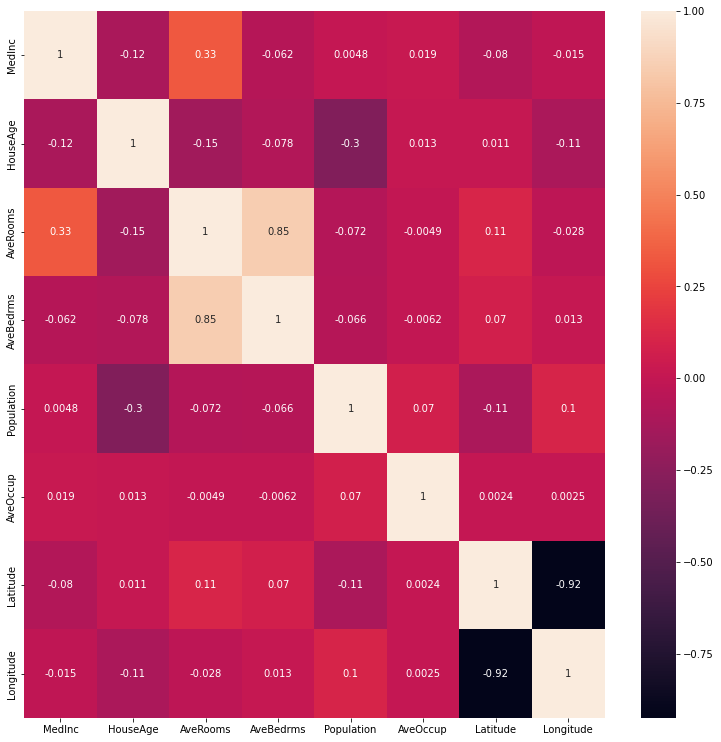

In [82]:
import seaborn as sns # 引入seaborn

plt.figure(figsize= (13, 13)) # 圖形大小
sns.heatmap(df_data.corr(),annot = True) # 塗顏色
plt.show() # 顯示圖形


### Linear Regression
- using 70% data for training, 30% for testing

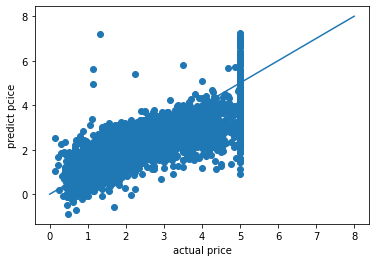

In [83]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot

x = data.data # 8個特徵的數據
y = data.target # 房價數據

# Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

# Predict
y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,8], [0,8]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

### Prediction Score
- 0.6 -> low
- possible reason: features may not have linear correlation with house price
- solutions:
  - only takes features with linear correlation
  - use polynomial regression
  - dimension reduction


In [84]:
lnregr.score(x_train, y_train) # 訓練模型的正確率

0.6097142031496132

### Only takes important feature

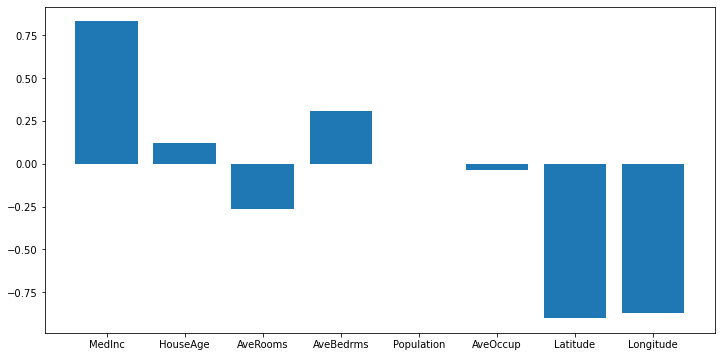

In [85]:
import pandas as pd # 引入pandas
import numpy as np # 引入numpy
from sklearn.tree import DecisionTreeClassifier # 引入DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # 引入PCA
import matplotlib.pyplot as plt # 引入pyplot

x = data.data # 13個特徵的數據
y = data.target # 特徵名稱

std_tool = StandardScaler() 
x = std_tool.fit_transform(x) # 將資料標準化

dt_model = LinearRegression()
dt_model.fit(x,y)
feature_importance = dt_model.coef_ # 重要性

plt.figure(figsize=(12, 6)) # 圖形大小
plt.bar(df_data.columns , feature_importance) # 繪製成直方圖
plt.show() # 顯示圖形

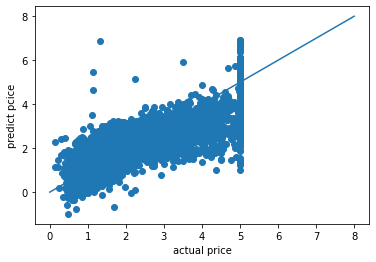

0.5983103265148373

In [86]:
df_data2 = df_data.drop(["HouseAge", "Population", "AveOccup"], axis = 1)

x = df_data2 # 重要特徵的數據
y = data.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

std_tool = StandardScaler() 
x_train = std_tool.fit_transform(x_train) # 將資料標準化

lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練

x_test = std_tool.transform(x_test)
y_predict = lnregr.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,8], [0,8]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

lnregr.score(x_train, y_train) # 訓練模型的正確率

### PCA dimension reduction

In [95]:
from sklearn.model_selection import train_test_split # 引入train_test_split
from sklearn import decomposition # 引入decomposition
from sklearn.preprocessing import StandardScaler

x = data.data # pca降維後的數據
y = data.target # 房價數據

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 將數據分成73比

# Standarize our training data
std_tool = StandardScaler()
std_tool.fit(x_train)                   # Compute the mean and std to be used for later scaling.
x_train = std_tool.transform(x_train)   # Perform standardization by centering and scaling.
x_test = std_tool.transform(x_test)

# PC降維
pca = decomposition.PCA(n_components=0.95)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

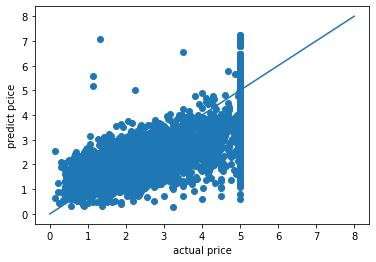

0.5099357855649468

In [96]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
import matplotlib.pyplot as plt # 引入pyplot

# Dimension reduction usng PCA
lnregr = LinearRegression()
lnregr.fit(x_train, y_train) # 將資料拿去訓練
y_predict = lnregr.predict(x_test) # 將test的資料用訓練出來的模型去預測

plt.xlabel("actual price") # x軸的標題
plt.ylabel("predict pcice") # y軸的標題
plt.plot([0,8], [0,8]) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

lnregr.score(x_train, y_train) # 訓練模型的正確率